# Setup

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


In [3]:
data = pd.read_csv("nifty_data_2020.csv", parse_dates=["Date"], index_col="Date")
data.head()

,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Pharma index
Date,,,,
2020-01-01,32102.90,30234.25,15722.15,8047.10
2020-01-02,32443.85,30266.20,15709.65,8053.95
2020-01-03,32069.25,30109.25,15936.60,8111.95
2020-01-06,31237.15,29799.30,15879.80,7987.35
2020-01-07,31399.40,29861.80,15895.20,8036.50


In [36]:
# Using pandas `resample` to aggregate data by month. 
data_by_month = data.resample(rule="M").mean()
data_by_month

,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Pharma index
Date,,,,
2020-01-31,31446.391304,30791.567391,16177.997826,8184.965217
2020-02-29,30675.427500,30468.122500,16411.647500,8140.932500
2020-03-31,22936.040476,26407.204762,13356.300000,7187.983333
2020-04-30,19715.116667,28622.122222,12750.766667,8926.777778
2020-05-31,18707.215789,27325.952632,13569.336842,9324.586842
2020-06-30,20953.679545,29321.377273,14585.154545,10036.240909
2020-07-31,22235.144737,30906.789474,16223.036842,10113.686842


# Simple plots with Pandas

`df.plot == wrapper for plot.plot`

## Line Plot

<AxesSubplot:title={'center':'Nifty Index Values in 2020'}, xlabel='Values'>

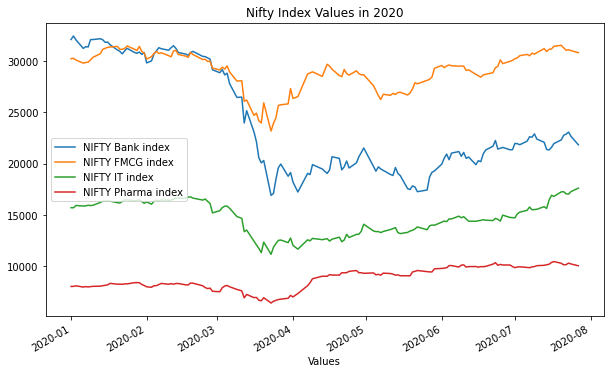

In [8]:
data.plot(
    title="Nifty Index Values in 2020",
    xlabel="Values",
    figsize=(10,6)
)

## Scatter Plot

<AxesSubplot:title={'center':'Scatter PLot for NIFTY Index values in 2020'}, xlabel='NIFTY FMCG index', ylabel='NIFTY Bank index'>

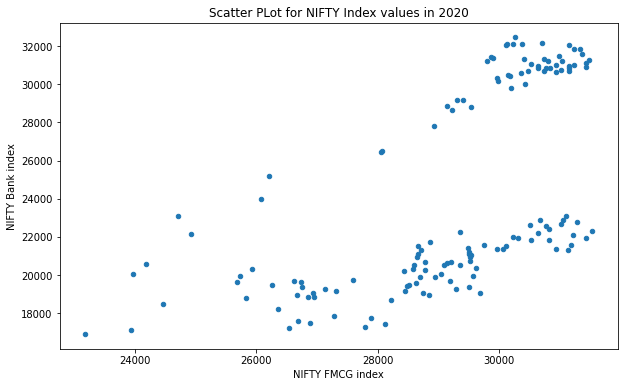

In [7]:
data.plot(
    kind="scatter", 
    x="NIFTY FMCG index", 
    y="NIFTY Bank index", 
    title="Scatter PLot for NIFTY Index values in 2020", 
    figsize=(10,6)
)

## Histogram

<AxesSubplot:ylabel='Frequency'>

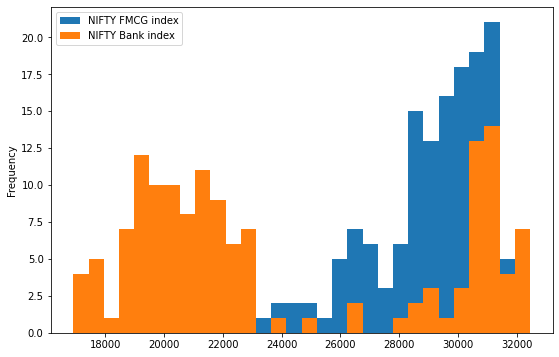

In [9]:
data[["NIFTY FMCG index", "NIFTY Bank index"]].plot(
    kind="hist",
    figsize=(9,6),
    bins=30
)

## Bar Plot

<AxesSubplot:xlabel='Date'>

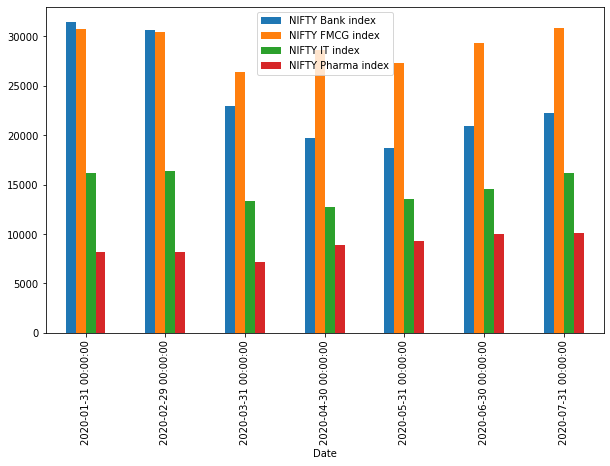

In [13]:
data_by_month.plot(kind="bar", figsize=(10,6))

## Stacked Bar Plot

<AxesSubplot:ylabel='Date'>

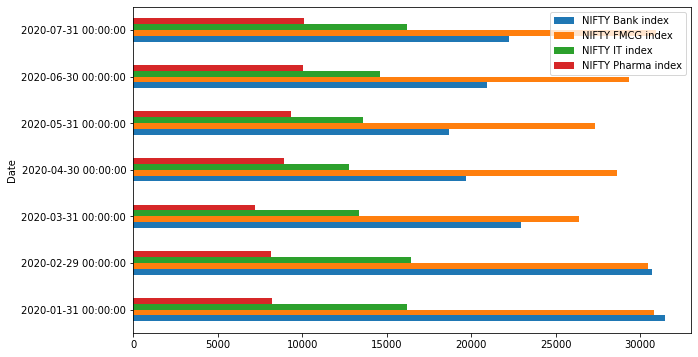

In [15]:
data_by_month.plot(kind="barh", figsize=(10, 6))

## Pie Chart

<AxesSubplot:ylabel='NIFTY Bank index'>

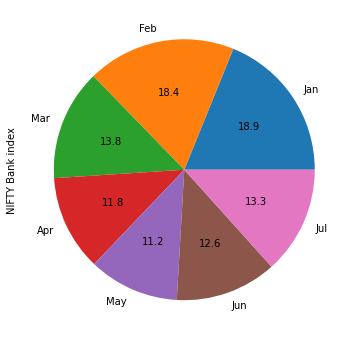

In [21]:
data_by_month.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
data_by_month['NIFTY Bank index'].plot.pie(legend=False, figsize=(10, 6), autopct="%.1f")


# Bokeh for Pandas

In [50]:
import pandas_bokeh

pandas_bokeh.output_notebook()
# Plots as HTML >> pandas_bokeh.output_file(<filename>)

Loading BokehJS ...

## Line Plot

In [40]:

data.plot_bokeh.line()

Figure(id='4089', ...)

## Scatter Plot

In [39]:
data.plot_bokeh.scatter(x="NIFTY FMCG index", y="NIFTY Bank index")

Figure(id='3862', ...)

## Histogram

In [29]:
data[["NIFTY FMCG index", "NIFTY Bank index"]].plot_bokeh(kind="hist", bins=30)

Figure(id='1484', ...)

## Bar Plot

In [42]:
data_by_month.plot_bokeh(kind="bar")

Figure(id='4928', ...)

## Stacked Bar Plot

In [43]:
data_by_month.plot_bokeh(kind="barh", stacked=True)

Figure(id='5281', ...)

## Pie Charts

In [46]:
data_by_month.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
data_by_month.plot_bokeh.pie(y="NIFTY Bank index")

__x__values_original


Figure(id='5639', ...)

In [47]:
data_by_month.plot_bokeh.pie()

__x__values_original


Figure(id='5960', ...)

# Ploty with Pandas via Cufflinks

Cufflinks serves as a wrapper for Plotty, simplifying the API thought Pandas.

In [52]:
import cufflinks as cf

from IPython.display import display, HTML

# makes all charts "public" + sets a global theme
cf.set_config_file(sharing="public", theme="white", offline=True)

## Line Plot

In [53]:
data.iplot(kind="line")

## Scatter Plot

In [54]:
data.iplot(kind="scatter", x="NIFTY FMCG index", y="NIFTY Bank index", mode="markers")

## Histogram

In [56]:
data[["NIFTY FMCG index", "NIFTY Bank index"]].iplot(kind="hist", bins=30)

## Bar Plot

In [58]:
data_by_month.iplot(kind="bar")

## Stacked Bar Plot

In [59]:
data_by_month.iplot(kind="barh", barmode="stack")

## Pie Chart

In [61]:
data_by_month.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
data_by_month.reset_index().iplot(kind="pie", labels="index", values="NIFTY Bank index")